In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("Admission_predict.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

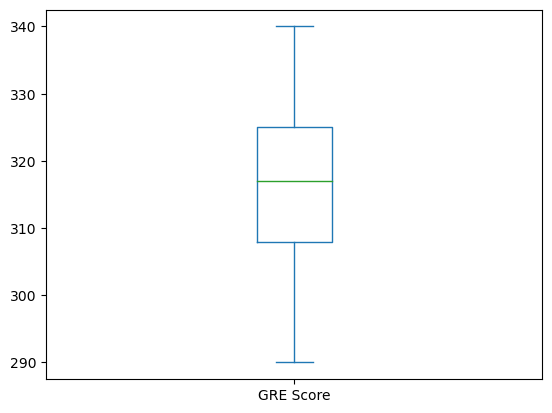

In [6]:
data["GRE Score"].plot.box()

In [7]:
def box_plot(col):
    plt.figure()
    data[col].plot(kind="box")
    plt.title(f"Box plot of {col}")
    #plot.xlable(col)
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

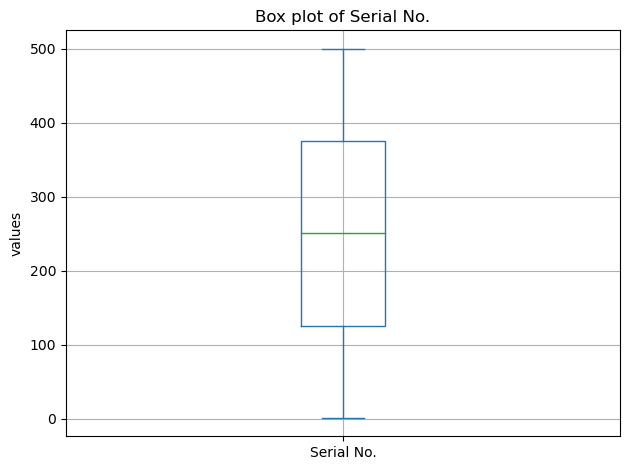

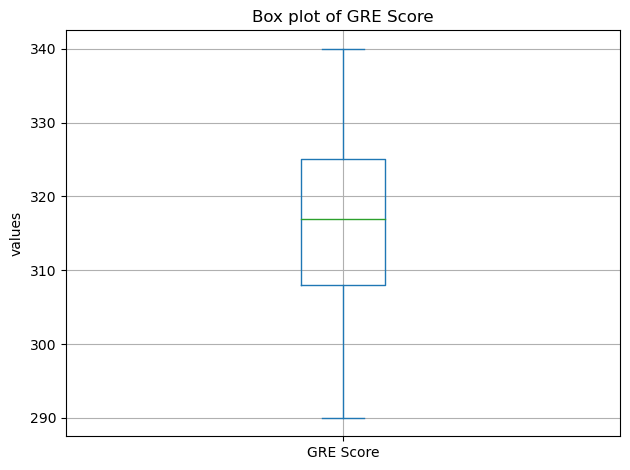

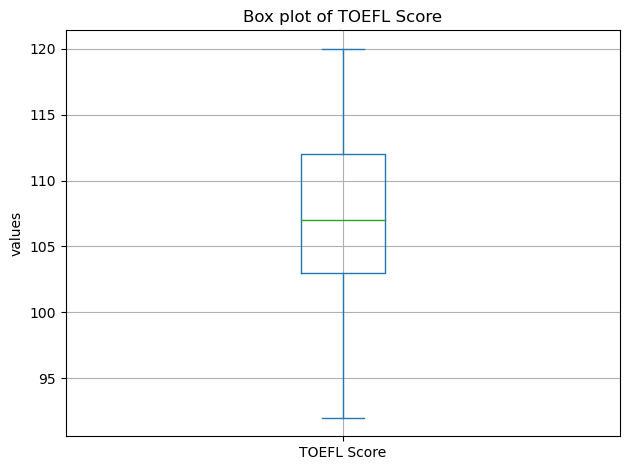

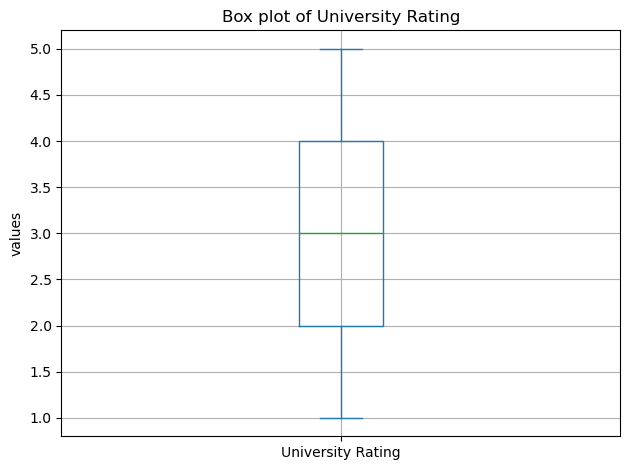

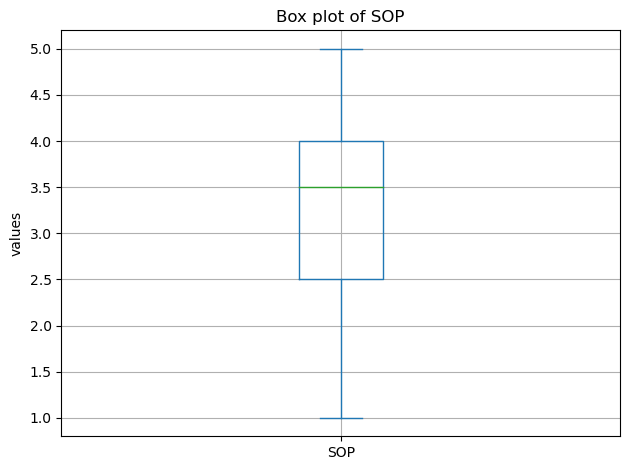

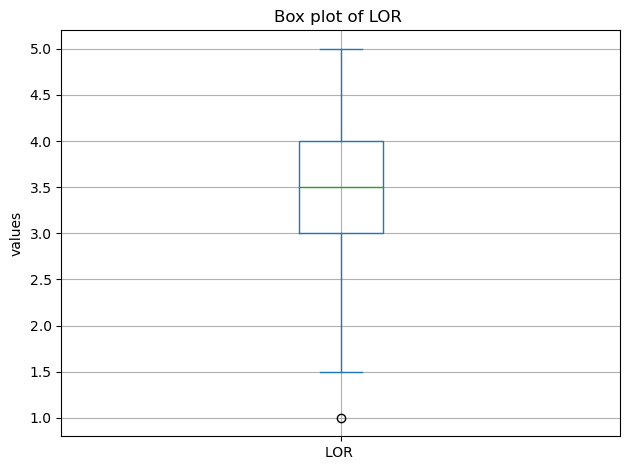

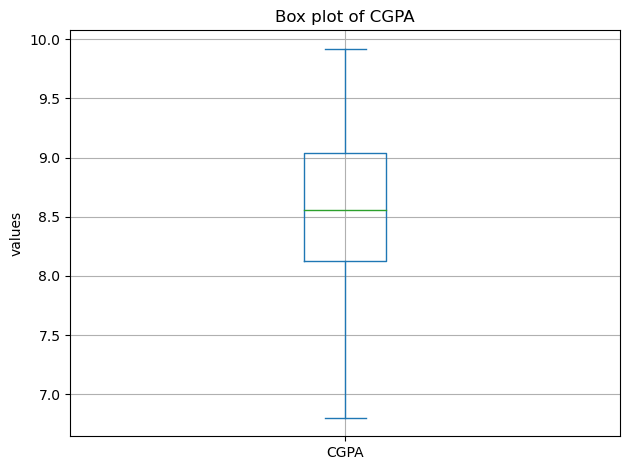

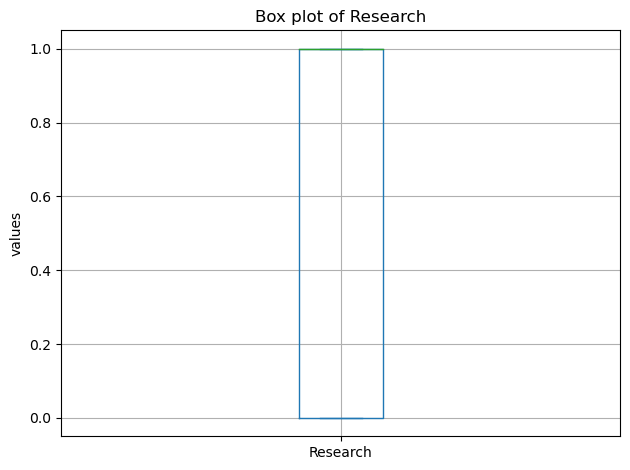

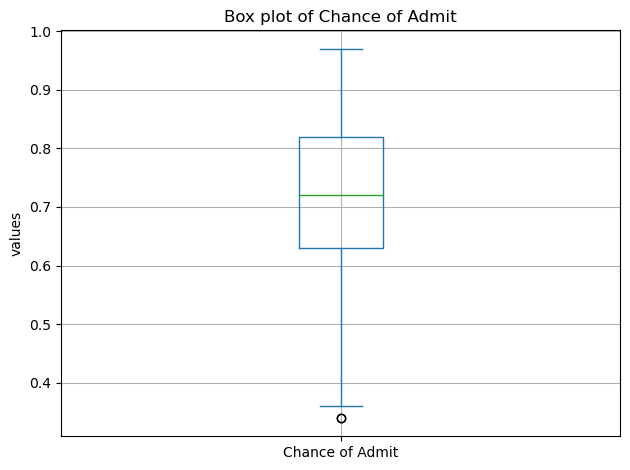

In [8]:
for col in data.columns:
    box_plot(col)

<Axes: xlabel='University Rating'>

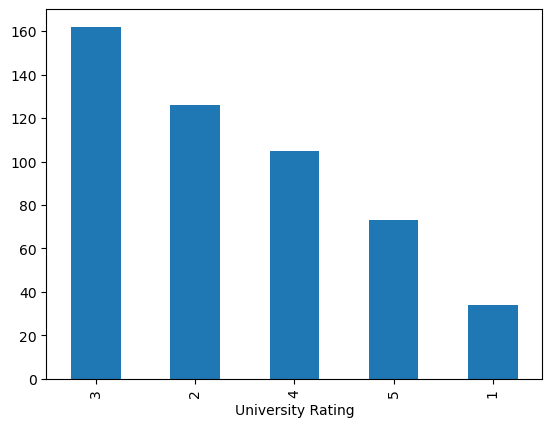

In [9]:
data["University Rating"].value_counts().plot(kind="bar")



In [10]:
def bar_plot(col):
    plt.figure()
    data[col].value_counts().plot(kind="bar",rot=90)
    plt.title(f"Bar plot of {col}")
    plt.xticks(fontsize=10)
    #plot.xlable(col)
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

In [11]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

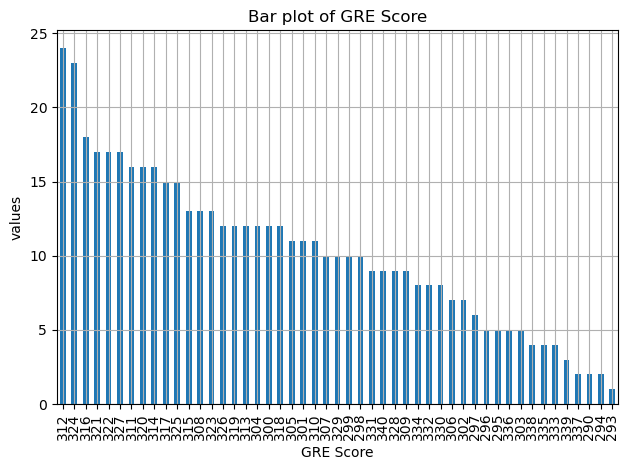

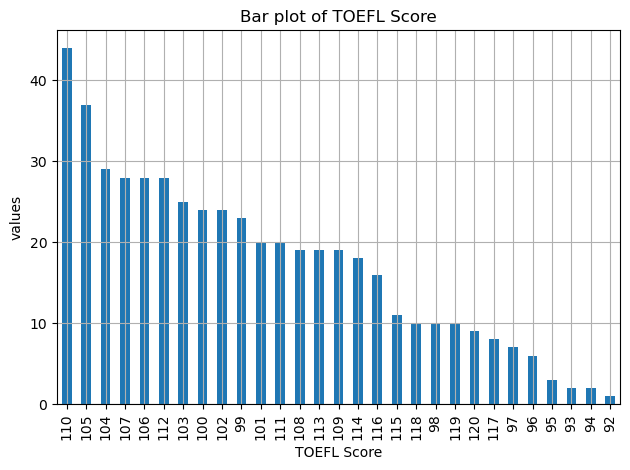

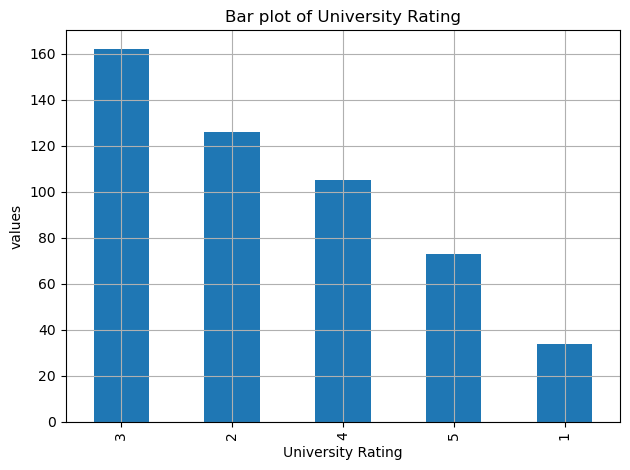

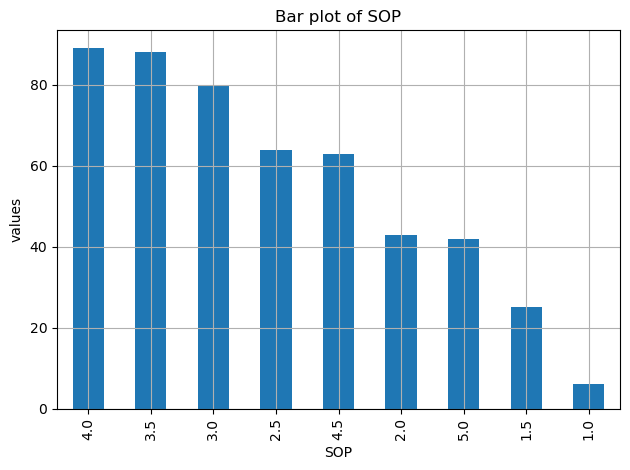

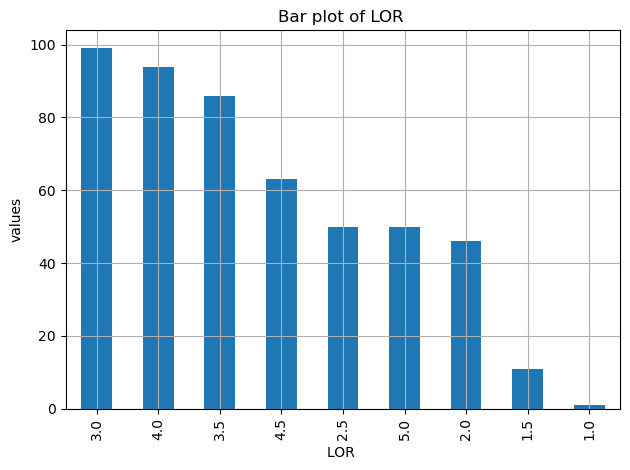

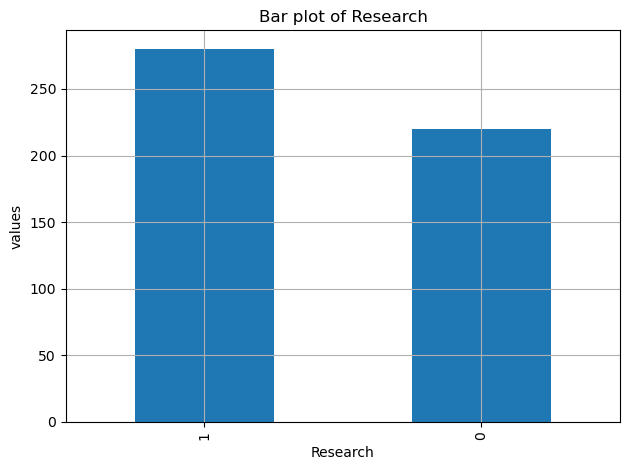

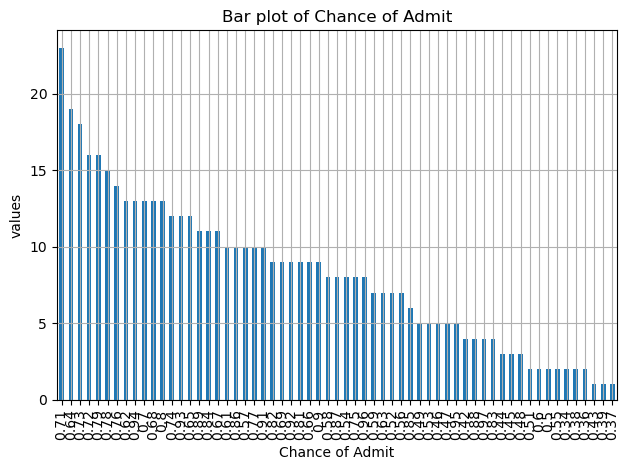

In [12]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating','SOP','LOR ', 'Research', 'Chance of Admit']:
    bar_plot(col)

In [13]:
def line_plot(col):
    plt.figure()
    data[col].value_counts().plot(kind="line",rot=90)
    plt.title(f"line plot of {col}")
    plt.xticks(fontsize=10)
    #plot.xlable(col)
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

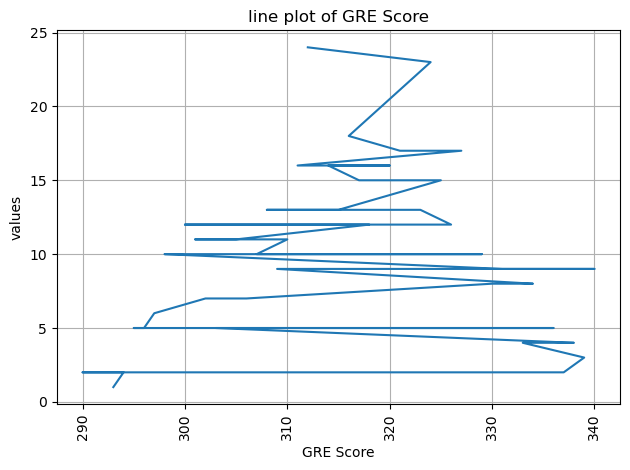

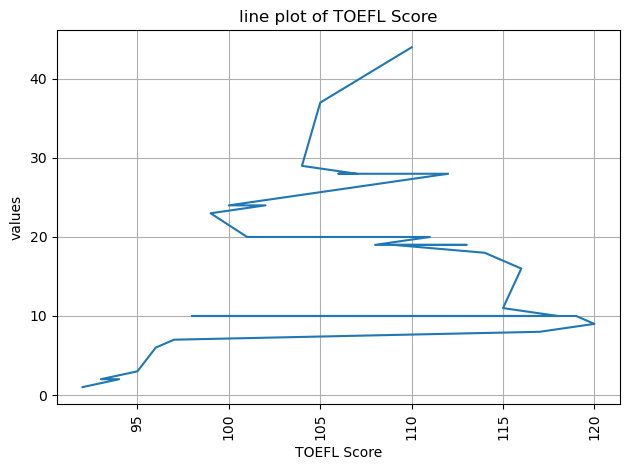

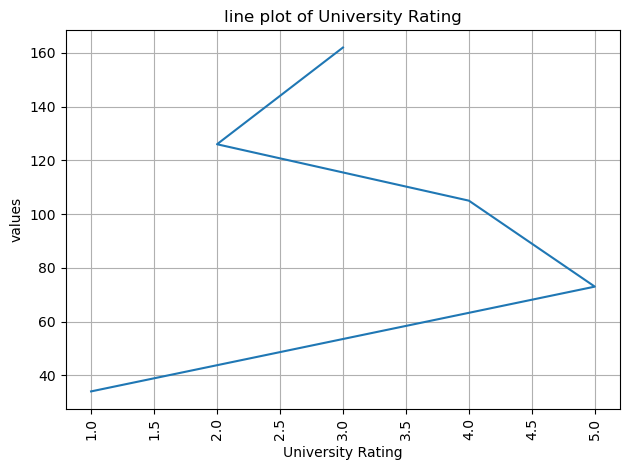

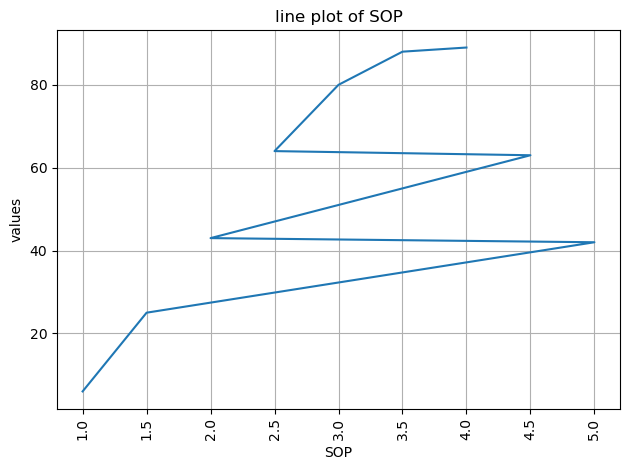

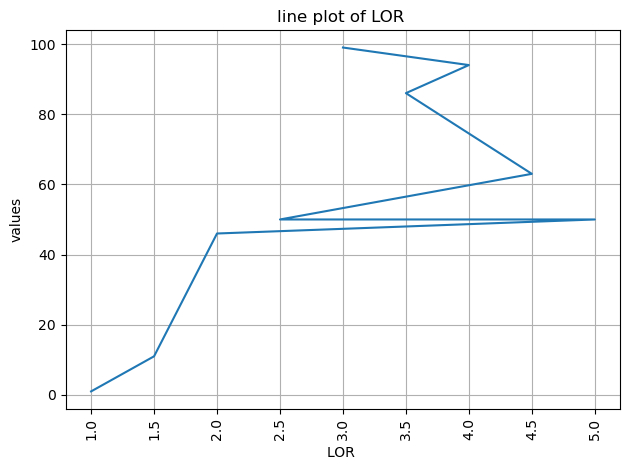

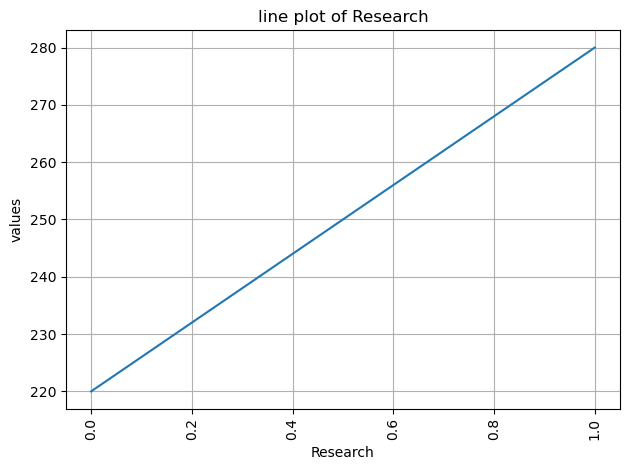

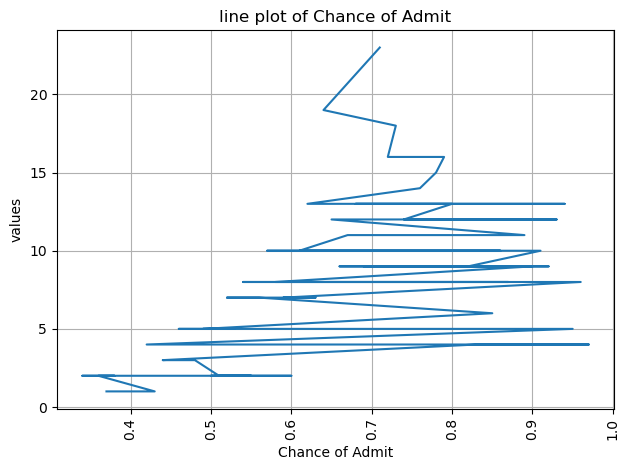

In [14]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating','SOP','LOR ', 'Research', 'Chance of Admit']:
    line_plot(col)

In [15]:
y=data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [16]:
x=data.drop(["Chance of Admit","Serial No."],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=2)
print(f"x_train{x_train.shape}")
print(f"x_test{x_test.shape}")
print(f"y_train{y_train.shape}")
print(f"y_test{y_test.shape}")


x_train(350, 7)
x_test(150, 7)
y_train(350,)
y_test(150,)


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [21]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_test_v1=model_lr.predict(x_test)
y_test_v1

array([0.9309531 , 0.72489282, 0.53403236, 0.97671545, 0.54601857,
       0.62187632, 0.81149089, 0.58454954, 0.5074575 , 0.6253587 ,
       0.61977884, 0.54785062, 0.49078767, 0.70620981, 0.52940389,
       0.689215  , 0.51875156, 0.63969492, 0.77379919, 0.88561105,
       0.87390632, 0.76298757, 0.67641026, 0.46333   , 0.78431596,
       0.88874915, 0.73287804, 0.70175186, 0.58397981, 0.61402829,
       0.73417225, 0.97859528, 0.50247354, 0.95880399, 0.68093955,
       0.72037634, 0.79057677, 0.79242859, 0.64357782, 0.68875946,
       0.82762346, 0.9611836 , 0.78446034, 0.94330161, 0.59666375,
       0.75331895, 0.77259854, 0.99624079, 0.88334747, 0.79224222,
       0.60639345, 0.5345322 , 0.91164184, 0.68920765, 0.73825789,
       0.54747819, 0.93290361, 0.73355898, 0.997998  , 0.7562652 ,
       0.59947761, 0.71838848, 0.70153481, 0.95532286, 0.70436121,
       0.67667125, 0.72011201, 0.78987651, 0.64222538, 0.75325503,
       0.65828084, 0.57104088, 0.6171557 , 0.90731242, 0.84049

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
mse=mean_squared_error(y_test,y_test_v1)

In [25]:
rmse=sqrt(mse)

In [26]:
rmse

0.06431130382137862

In [27]:
1-8

-7

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score



In [29]:
select_model=[LinearRegression(),
            DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
            RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

In [30]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_model:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("-------")
    print(f"List of R square {my_r_square}")
    adj_r_squared_test=1 -(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r_squared_test")
    adj_r2_square_value.append(adj_r_squared_test)
    print(f"Adjusted R Square{adj_r2_square_value} of model {model}")
    print("-------")
    print(f"Adjusted R Square{adj_r2_square_value}")

RMSE value [0.06431130382137862] and R Squared value [0.7813539442978403] of model LinearRegression()
List of Rmse [0.06431130382137862]
-------
List of R square [0.7813539442978403]
LinearRegression(),adj_r_squared_test
Adjusted R Square[0.7705756176082972] of model LinearRegression()
-------
Adjusted R Square[0.7705756176082972]
RMSE value [0.06431130382137862, 0.0761965355973422] and R Squared value [0.7813539442978403, 0.6999077098182227] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06431130382137862, 0.0761965355973422]
-------
List of R square [0.7813539442978403, 0.6999077098182227]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r_squared_test
Adjusted R Square[0.7705756176082972, 0.6851144279078534] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
-------
Adjusted R Square[0.7705756176082972, 0.6851144279078534]
RMSE value [0.06431130382137862, 0.0761965355973422, 0.06524763722732116] and R Sq

In [31]:
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.06431130382137862, 0.0761965355973422, 0.06524763722732116],
 [0.7813539442978403, 0.6999077098182227, 0.7660909694918305],
 [0.7705756176082972, 0.6851144279078534, 0.754560242635794]]

In [32]:
a=pd.DataFrame(data=result,columns=["LR","DTC","RF"], index=["rmse","R Square","Adjusted R Square"])

Text(0, 0.5, 'values')

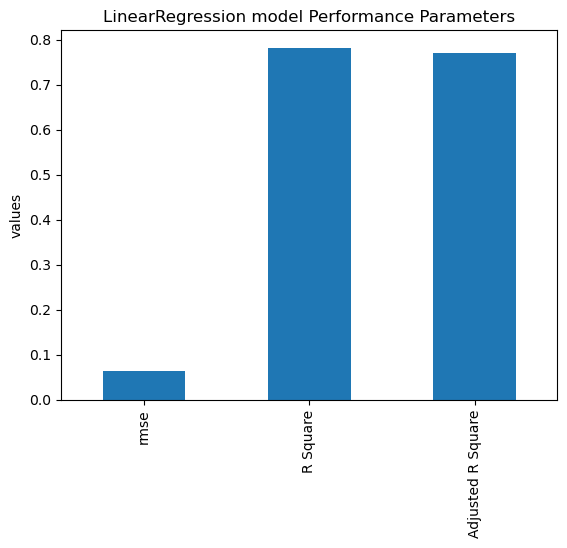

In [33]:
a.LR.plot(kind="bar")
plt.title("LinearRegression model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

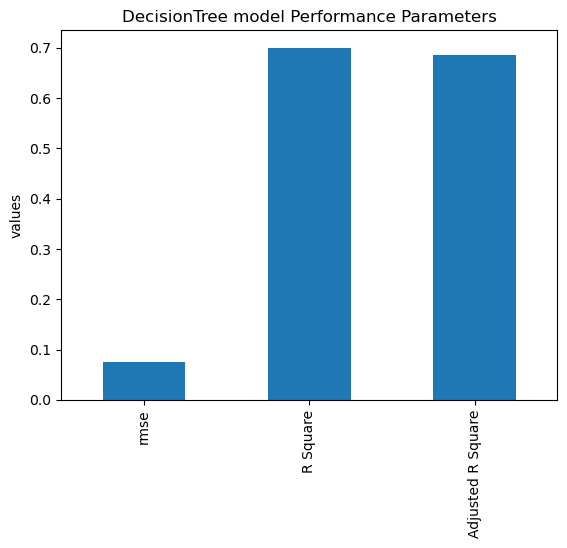

In [34]:
a.DTC.plot(kind="bar")
plt.title("DecisionTree model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

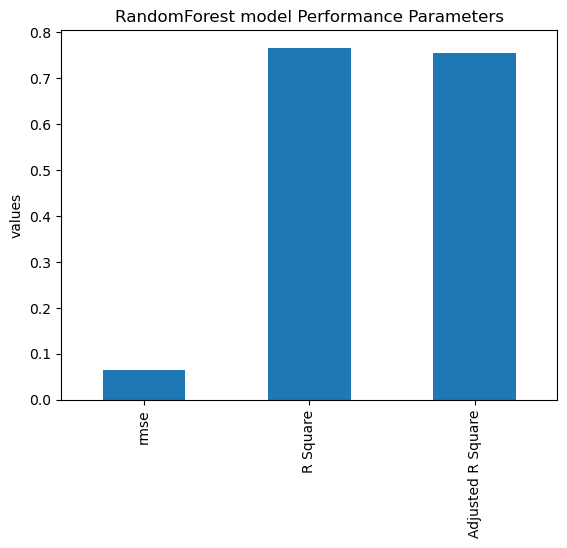

In [35]:
a.RF.plot(kind="bar")
plt.title("RandomForest model Performance Parameters")
plt.ylabel("values")

In [36]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"Model Performance Graph {col}")
    plt.ylabel("values")
    plt.grid(True)
    plt.tight_layout()

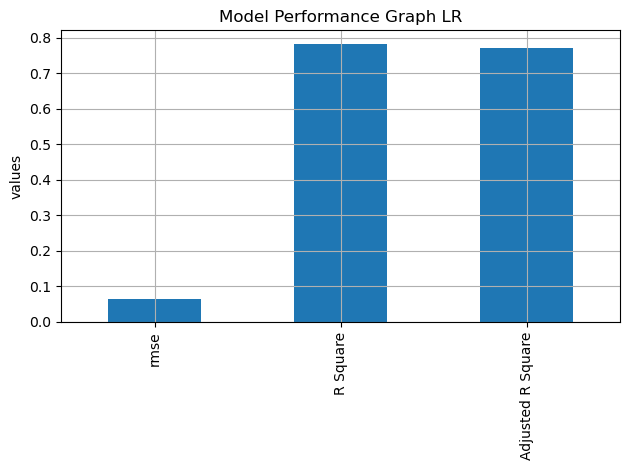

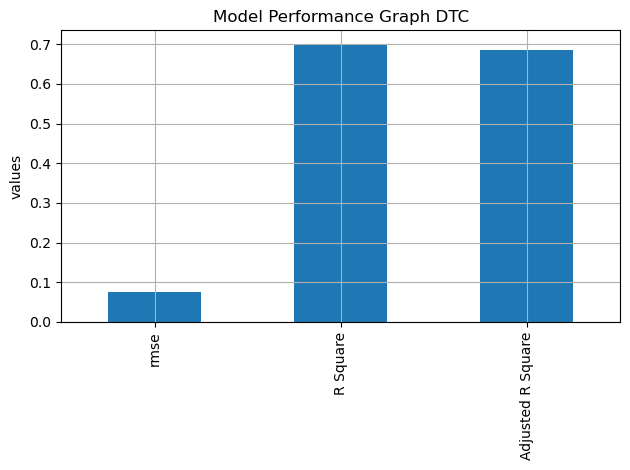

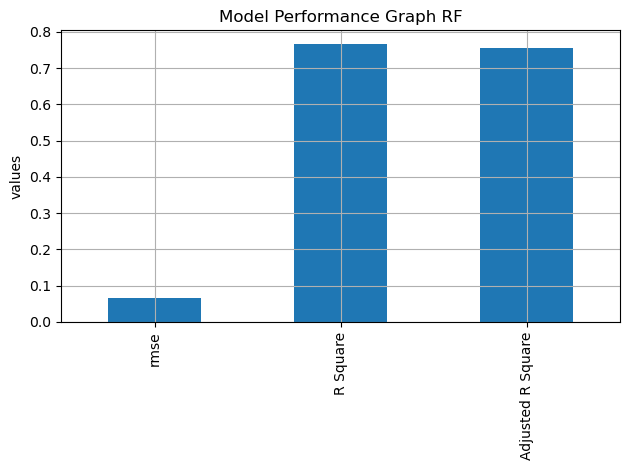

In [37]:
for col in a.columns:
    my_model_plot(col)

In [38]:
rf=RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)
rf.fit(x_train,y_train)
rf.predict(x_test)

array([0.93478671, 0.72304587, 0.51293837, 0.94915972, 0.56003393,
       0.63383083, 0.80405202, 0.55150183, 0.50549856, 0.63465778,
       0.61905012, 0.56373369, 0.48993952, 0.67559944, 0.49631884,
       0.73230444, 0.53337583, 0.64141655, 0.76751091, 0.8687748 ,
       0.89288663, 0.74834488, 0.68618925, 0.48873825, 0.78417252,
       0.89833544, 0.7232675 , 0.72736883, 0.63757163, 0.61254583,
       0.75438139, 0.94102104, 0.49465806, 0.93548937, 0.69464873,
       0.71214187, 0.81267805, 0.75847464, 0.64704226, 0.65840317,
       0.83030627, 0.95627837, 0.77628187, 0.9122335 , 0.61097385,
       0.7634371 , 0.74314484, 0.95718516, 0.92029904, 0.7948194 ,
       0.55064862, 0.5443725 , 0.9195761 , 0.71703197, 0.73296063,
       0.57496679, 0.91433548, 0.7285977 , 0.95794147, 0.7365756 ,
       0.6216456 , 0.76983768, 0.69459917, 0.92548175, 0.73457476,
       0.68100091, 0.70279959, 0.78149608, 0.6425094 , 0.74207413,
       0.66926921, 0.61857539, 0.62377171, 0.91041098, 0.82829

In [39]:
import pickle
pickle.dump(rf,open("case_study_university.pkl","wb"))